Qiskit - Rotated Surface 17 Code
====================================
Author: Michel Meulen <br>
Date: 02-01-2025

This notebook features an implementation, using Qiskit, of the rotated surface 17 code. This rotated surface code is named for the sum of its 9 data qubits and 8 syndrome qubits. It uses the smallest number of qubits to perform fault-tolerant error correction on a surface code with parallel syndrome extraction. 

Qiskit - Encoder- & Decoder-Circuit
--------------------------
The following illustration shows the encoder circuit for the rotated surface 17 code. It creates a nine qubit logical zero state. Below is also showed  the decoding circuit, which reverts the logical zero state to its original initialization state. During the encoded logical state, syndrome extraction methods can be applied to discover both bit- and phase-flips. 

<img src="./pictures/surface_code/rotated_surface_17_code_encoder.png" alt="Rotated surface 17 code" style="width:30%;"/>
<img src="./pictures/surface_code/rotated_surface_17_code_decoder.png" alt="Rotated surface 17 code" style="width:30%;"/>

Qiskit - Encoder & Decoder example
-----------------------------------


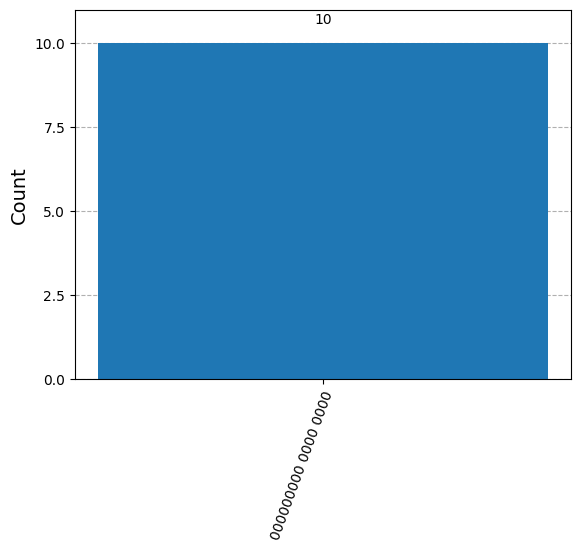

In [2]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
from SurfaceCodeQiskit import SurfaceCode

code = SurfaceCode()

code.add_encoder_circuit()
code.add_decoder_circuit()
code.measure_all_data_qubits()

# Classical registers used are from left to right:
# 9-bits data qubit measurements, 4-bits stabilizer-Z measurements, 4-bits stabilizer-X measurements
backend = BasicSimulator()
result = backend.run(code.qc, shots=10).result()   
counts = result.get_counts()                    
plot_histogram(counts)

Qiskit - Syndrome Extraction Methods
------------------------------------

The rotated surface 17 code uses stabilizer measurements to scan for possible bit- and phase-flips. It follows a specific layout which makes it possible to accurately detect one error of each type of error on the data qubits. The following layout is used: 

<img src="./pictures/surface_code/rotated_surface_17_code.png" alt="Rotated surface 17 code" style="width:30%;"/>

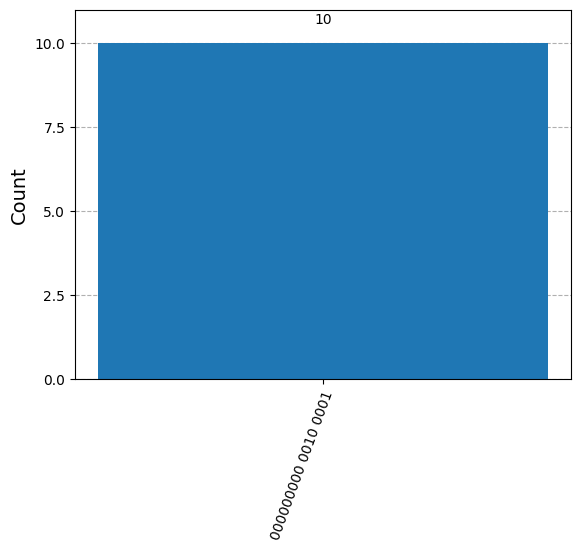

In [1]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
from SurfaceCodeQiskit import SurfaceCode

# Qubit aliases 
D1, D2, D3, D4, D5, D6, D7, D8, D9 = 0, 1, 2, 3, 4, 5, 6, 7, 8

code = SurfaceCode()

code.add_encoder_circuit()

code.create_bit_flip(D1)
code.create_phase_flip(D1)

code.add_stabilizer_x_syndrome_extraction()
code.add_stabilizer_z_syndrome_extraction()

# Classical registers used are from left to right:
# 9-bits data qubit measurements, 4-bits stabilizer-Z measurements, 4-bits stabilizer-X measurements
backend = BasicSimulator()
result = backend.run(code.qc, shots=10).result()   
counts = result.get_counts()                    
plot_histogram(counts)